In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=03d3d9f08c4a1c381420ac76d8c7d337c8218f0dffd5025f8728b8f11436f769
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
# Define input variables
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
soil_moisture = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_moisture')
temperature = ctrl.Antecedent(np.arange(10, 46, 1), 'temperature')
rain = ctrl.Antecedent(np.arange(0, 101, 1), 'rain')
soil_water_level = ctrl.Antecedent(np.arange(0, 601, 1), 'soil_water_level')

In [ ]:
# Define output variable
irrigation = ctrl.Consequent(np.arange(0, 101, 1), 'irrigation')

In [ ]:
# Define membership functions for inputs and output
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [20, 50, 80])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

soil_moisture['dry'] = fuzz.trimf(soil_moisture.universe, [0, 0, 50])
soil_moisture['medium'] = fuzz.trimf(soil_moisture.universe, [20, 50, 80])
soil_moisture['wet'] = fuzz.trimf(soil_moisture.universe, [50, 100, 100])

temperature['cold'] = fuzz.trimf(temperature.universe, [10, 10, 27.5])
temperature['medium'] = fuzz.trimf(temperature.universe, [22.5, 35, 47.5])
temperature['hot'] = fuzz.trimf(temperature.universe, [35, 45, 45])

rain['none'] = fuzz.trimf(rain.universe, [0, 0, 50])
rain['light'] = fuzz.trimf(rain.universe, [20, 50, 80])
rain['heavy'] = fuzz.trimf(rain.universe, [50, 100, 100])

soil_water_level['low'] = fuzz.trimf(soil_water_level.universe, [0, 0, 200])  # Adjusted range
soil_water_level['medium'] = fuzz.trimf(soil_water_level.universe, [100, 300, 500])  # Adjusted range
soil_water_level['high'] = fuzz.trimf(soil_water_level.universe, [400, 600, 600])  # Adjusted range

irrigation['low'] = fuzz.trimf(irrigation.universe, [0, 0, 50])
irrigation['medium'] = fuzz.trimf(irrigation.universe, [20, 50, 70])
irrigation['high'] = fuzz.trimf(irrigation.universe, [50, 100, 100])

In [ ]:
# Define rules
rule1 = ctrl.Rule(humidity['low'] | soil_moisture['dry'] | temperature['hot'] | rain['none'] | soil_water_level['low'], irrigation['high'])
rule2 = ctrl.Rule(humidity['medium'] | soil_moisture['medium'] | temperature['medium'] | rain['light'] | soil_water_level['medium'], irrigation['medium'])
rule3 = ctrl.Rule(humidity['high'] | soil_moisture['wet'] | temperature['cold'] | rain['heavy'] | soil_water_level['high'], irrigation['low'])
rule4 = ctrl.Rule(humidity['medium'] & soil_moisture['dry'] & temperature['hot'] & rain['none'] & soil_water_level['medium'], irrigation['high'])
rule5 = ctrl.Rule(humidity['high'] & soil_moisture['medium'] & temperature['medium'] & rain['light'] & soil_water_level['high'], irrigation['low'])
rule6 = ctrl.Rule(humidity['low'] & soil_moisture['wet'] & temperature['hot'] & rain['heavy'] & soil_water_level['low'], irrigation['medium'])
rule7 = ctrl.Rule(humidity['low'] | soil_moisture['dry'] | temperature['cold'] | rain['none'] | soil_water_level['medium'], irrigation['medium'])
rule8 = ctrl.Rule(humidity['medium'] | soil_moisture['wet'] | temperature['hot'] | rain['heavy'] | soil_water_level['low'], irrigation['high'])
rule9 = ctrl.Rule(humidity['high'] & soil_moisture['dry'] | temperature['cold'] & rain['none'] | soil_water_level['high'], irrigation['low'])
rule10 = ctrl.Rule(humidity['medium'] & soil_moisture['dry'] | temperature['medium'] & rain['light'] | soil_water_level['medium'], irrigation['high'])
rule11 = ctrl.Rule(humidity['low'] | soil_moisture['wet'] | temperature['hot'] & rain['heavy'] | soil_water_level['low'], irrigation['medium'])
rule12 = ctrl.Rule(humidity['high'] | soil_moisture['wet'] | temperature['cold'] | rain['heavy'] | soil_water_level['low'], irrigation['low'])
rule13 = ctrl.Rule(humidity['low'] & soil_moisture['medium'] | temperature['cold'] & rain['none'] | soil_water_level['high'], irrigation['high'])
rule14 = ctrl.Rule(humidity['medium'] | soil_moisture['dry'] | temperature['medium'] | rain['light'] & soil_water_level['low'], irrigation['medium'])
rule15 = ctrl.Rule(humidity['high'] & soil_moisture['wet'] | temperature['cold'] | rain['none'] | soil_water_level['medium'], irrigation['low'])

In [ ]:
# Create control system
irrigation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])

In [ ]:
# Create simulation
irrigation_sim = ctrl.ControlSystemSimulation(irrigation_ctrl)

In [ ]:
# humidity_value = float(input("Enter humidity value (0-100): "))
# soil_moisture_value = float(input("Enter soil moisture value (0-100): "))
# temperature_value = float(input("Enter temperature value (10-45): "))
# rain_value = float(input("Enter rain value (0-1000): "))
# soil_water_level_value = float(input("Enter soil water level value (0-100): "))

# # Check if input values are within range
# if not (0 <= humidity_value <= 100):
#     raise ValueError("Humidity value must be between 0 and 100.")
# if not (0 <= soil_moisture_value <= 100):
#     raise ValueError("Soil moisture value must be between 0 and 100.")
# if not (10 <= temperature_value <= 45):
#     raise ValueError("Temperature value must be between 10 and 45.")
# if not (0 <= rain_value <= 1000):
#     raise ValueError("Rain value must be between 0 and 1000.")
# if not (0 <= soil_water_level_value <= 600):
#     raise ValueError("Soil water level value must be between 0 and 100.")

# Set input values in simulation
irrigation_sim.input['humidity'] = 60
irrigation_sim.input['soil_moisture'] = 50
irrigation_sim.input['temperature'] = 36
irrigation_sim.input['rain'] = 660
irrigation_sim.input['soil_water_level'] = 69


Enter humidity value (0-100): 60
Enter soil moisture value (0-100): 50
Enter temperature value (10-45): 36
Enter rain value (0-1000): 660
Enter soil water level value (0-100): 69


In [ ]:
# Compute
irrigation_sim.compute()

In [ ]:
# Output
print("Irrigation level:", irrigation_sim.output['irrigation'])

Irrigation level: 49.63069292048701


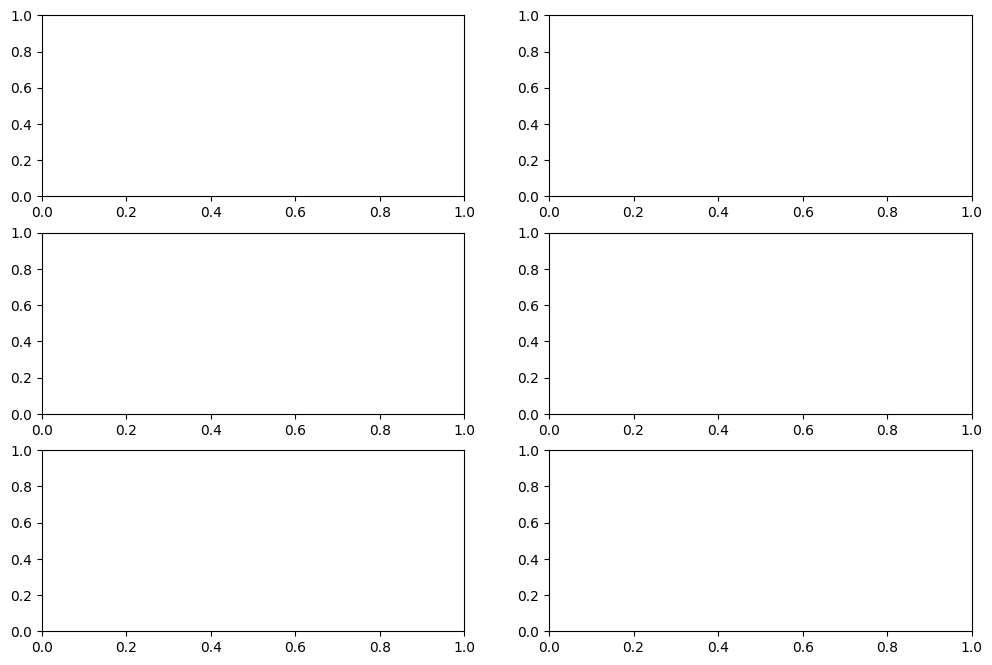

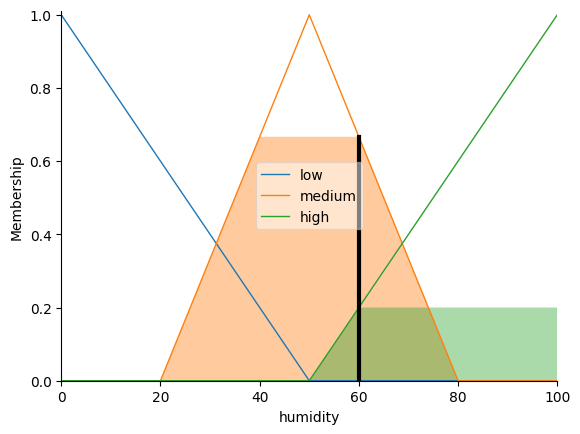

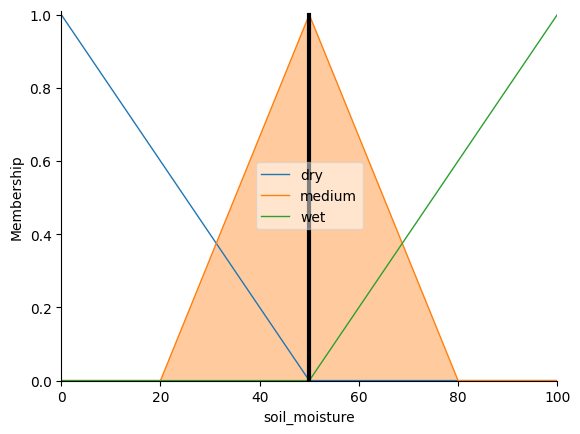

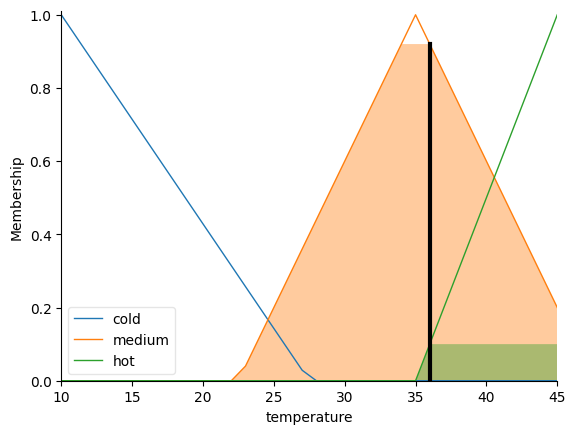

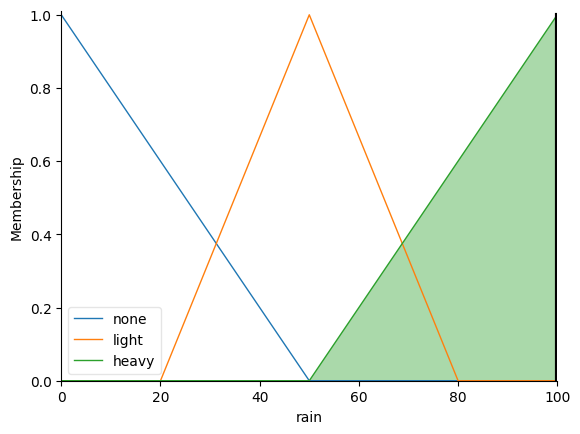

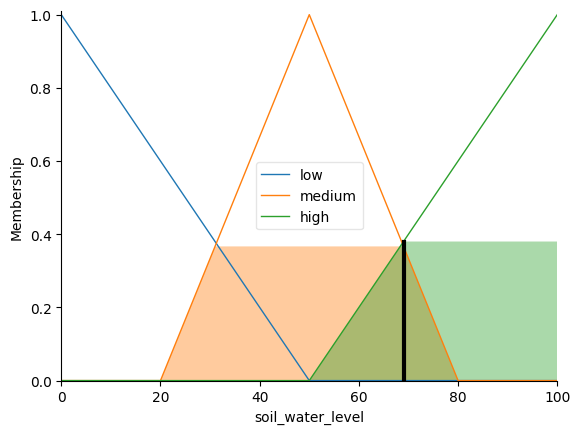

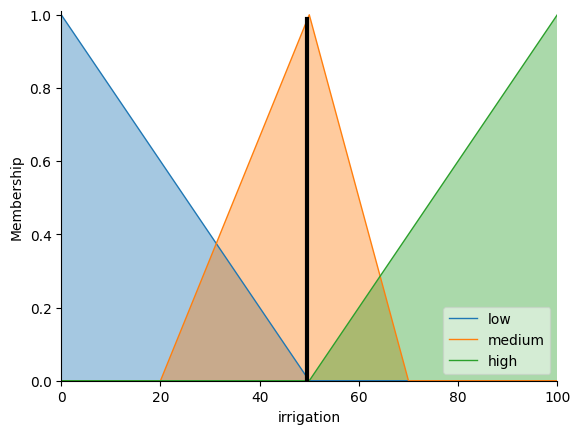

In [ ]:
# Visualization
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
humidity.view(ax=axs[0, 0], sim=irrigation_sim)
soil_moisture.view(ax=axs[0, 1], sim=irrigation_sim)
temperature.view(ax=axs[1, 0], sim=irrigation_sim)
rain.view(ax=axs[1, 1], sim=irrigation_sim)
soil_water_level.view(ax=axs[2, 0], sim=irrigation_sim)
irrigation.view(ax=axs[2, 1], sim=irrigation_sim)

In [ ]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.show()

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import itertools

# Define input variables
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
soil_moisture = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_moisture')
temperature = ctrl.Antecedent(np.arange(10, 46, 1), 'temperature')  # Adjusted range
rain = ctrl.Antecedent(np.arange(0, 1001, 1), 'rain')  # Adjusted range
soil_water_level = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_water_level')

# Define output variable
irrigation = ctrl.Consequent(np.arange(0, 101, 1), 'irrigation')

# Define membership functions for inputs and output
humidity['very_low'] = fuzz.trimf(humidity.universe, [0, 0, 20])
humidity['low'] = fuzz.trimf(humidity.universe, [10, 30, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [40, 60, 80])
humidity['high'] = fuzz.trimf(humidity.universe, [70, 90, 100])
humidity['very_high'] = fuzz.trimf(humidity.universe, [80, 100, 100])

soil_moisture['very_dry'] = fuzz.trimf(soil_moisture.universe, [0, 0, 20])
soil_moisture['dry'] = fuzz.trimf(soil_moisture.universe, [10, 30, 50])
soil_moisture['medium'] = fuzz.trimf(soil_moisture.universe, [40, 60, 80])
soil_moisture['wet'] = fuzz.trimf(soil_moisture.universe, [70, 90, 100])
soil_moisture['very_wet'] = fuzz.trimf(soil_moisture.universe, [80, 100, 100])

temperature['very_cold'] = fuzz.trimf(temperature.universe, [10, 10, 20])  # Adjusted range and membership functions
temperature['cold'] = fuzz.trimf(temperature.universe, [15, 25, 35])  # Adjusted range and membership functions
temperature['medium'] = fuzz.trimf(temperature.universe, [30, 35, 40])  # Adjusted range and membership functions
temperature['hot'] = fuzz.trimf(temperature.universe, [35, 40, 45])  # Adjusted range and membership functions
temperature['very_hot'] = fuzz.trimf(temperature.universe, [40, 45, 45])  # Adjusted range and membership functions

rain['no_rain'] = fuzz.trimf(rain.universe, [0, 0, 200])  # Adjusted range and membership functions
rain['light'] = fuzz.trimf(rain.universe, [100, 300, 500])  # Adjusted range and membership functions
rain['moderate'] = fuzz.trimf(rain.universe, [400, 600, 800])  # Adjusted range and membership functions
rain['heavy'] = fuzz.trimf(rain.universe, [700, 900, 1000])  # Adjusted range and membership functions
rain['very_heavy'] = fuzz.trimf(rain.universe, [800, 1000, 1000])  # Adjusted range and membership functions

soil_water_level['very_low'] = fuzz.trimf(soil_water_level.universe, [0, 0, 20])
soil_water_level['low'] = fuzz.trimf(soil_water_level.universe, [10, 30, 50])
soil_water_level['medium'] = fuzz.trimf(soil_water_level.universe, [40, 60, 80])
soil_water_level['high'] = fuzz.trimf(soil_water_level.universe, [70, 90, 100])
soil_water_level['very_high'] = fuzz.trimf(soil_water_level.universe, [80, 100, 100])

irrigation['very_low'] = fuzz.trimf(irrigation.universe, [0, 0, 20])
irrigation['low'] = fuzz.trimf(irrigation.universe, [10, 30, 50])
irrigation['medium'] = fuzz.trimf(irrigation.universe, [40, 60, 80])
irrigation['high'] = fuzz.trimf(irrigation.universe, [70, 90, 100])
irrigation['very_high'] = fuzz.trimf(irrigation.universe, [80, 100, 100])

# Generate all possible combinations of input variable levels
combinations = list(itertools.product(humidity, soil_moisture, temperature, rain, soil_water_level))

# Define rules
rule1 = ctrl.Rule(humidity['low'] | soil_moisture['dry'] | temperature['hot'] | rain['none'] | soil_water_level['low'], irrigation['high'])
rule2 = ctrl.Rule(humidity['medium'] | soil_moisture['medium'] | temperature['medium'] | rain['light'] | soil_water_level['medium'], irrigation['medium'])
rule3 = ctrl.Rule(humidity['high'] | soil_moisture['wet'] | temperature['cold'] | rain['heavy'] | soil_water_level['high'], irrigation['low'])
rule4 = ctrl.Rule(humidity['medium'] & soil_moisture['dry'] & temperature['hot'] & rain['none'] & soil_water_level['medium'], irrigation['high'])
rule5 = ctrl.Rule(humidity['high'] & soil_moisture['medium'] & temperature['medium'] & rain['light'] & soil_water_level['high'], irrigation['low'])
rule6 = ctrl.Rule(humidity['low'] & soil_moisture['wet'] & temperature['hot'] & rain['heavy'] & soil_water_level['low'], irrigation['medium'])
rule7 = ctrl.Rule(humidity['low'] | soil_moisture['dry'] | temperature['cold'] | rain['none'] | soil_water_level['medium'], irrigation['medium'])
rule8 = ctrl.Rule(humidity['medium'] | soil_moisture['wet'] | temperature['hot'] | rain['heavy'] | soil_water_level['low'], irrigation['high'])
rule9 = ctrl.Rule(humidity['high'] & soil_moisture['dry'] | temperature['cold'] & rain['none'] | soil_water_level['high'], irrigation['low'])
rule10 = ctrl.Rule(humidity['medium'] & soil_moisture['dry'] | temperature['medium'] & rain['light'] | soil_water_level['medium'], irrigation['high'])
rule11 = ctrl.Rule(humidity['low'] | soil_moisture['wet'] | temperature['hot'] & rain['heavy'] | soil_water_level['low'], irrigation['medium'])
rule12 = ctrl.Rule(humidity['high'] | soil_moisture['wet'] | temperature['cold'] | rain['heavy'] | soil_water_level['low'], irrigation['low'])
rule13 = ctrl.Rule(humidity['low'] & soil_moisture['medium'] | temperature['cold'] & rain['none'] | soil_water_level['high'], irrigation['high'])
rule14 = ctrl.Rule(humidity['medium'] | soil_moisture['dry'] | temperature['medium'] | rain['light'] & soil_water_level['low'], irrigation['medium'])
rule15 = ctrl.Rule(humidity['high'] & soil_moisture['wet'] | temperature['cold'] | rain['none'] | soil_water_level['medium'], irrigation['low'])

# Create control system with all rules
irrigation_ctrl = ctrl.ControlSystem(all_rules)

# Create simulation
irrigation_sim = ctrl.ControlSystemSimulation(irrigation_ctrl)

# Set input values
irrigation_sim.input['humidity'] = 60
irrigation_sim.input['soil_moisture'] = 40
irrigation_sim.input['temperature'] = 30
irrigation_sim.input['rain'] = 300
irrigation_sim.input['soil_water_level'] = 60

# Compute
irrigation_sim.compute()

# Output
print("Irrigation level:", irrigation_sim.output['irrigation'])

# Visualization (if needed)
# fig, axs = plt.subplots(3, 2, figsize=(12, 8))

# humidity.view(ax=axs[0, 0], sim=irrigation_sim)
# soil_moisture.view(ax=axs[0, 1], sim=irrigation_sim)
# temperature.view(ax=axs[1, 0], sim=irrigation_sim)
# rain.view(ax=axs[1, 1], sim=irrigation_sim)
# soil_water_level.view(ax=axs[2, 0], sim=irrigation_sim)
# irrigation.view(ax=axs[2, 1], sim=irrigation_sim)

# plt.tight_layout()
# plt.show()


ValueError: Membership function '0' does not exist for Antecedent humidity.
Available options: 'very_low'; 'low'; 'medium'; 'high', or 'very_high'.